# Analysis 4

## Plot 1: Comparision plot of number of women/men in each major Vs Median Pay
## Plot 2: Scatter Plot of percentage of Women in each major Vs Median Pay

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df2=pd.read_csv("~/Final/Data/recent-grads.csv")
df2.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
major=list(df2.groupby(by=['Major_category'])['Major_category'].unique())

In [4]:
total_men_grad=list(df2.groupby(by=['Major_category'])['Men'].sum())
total_women_grad=list(df2.groupby(by=['Major_category'])['Women'].sum())
median_Pay_major_category=list(df2.groupby(by=['Major_category'])['Median'].median())


In [5]:
df3=pd.DataFrame({'Total Men': total_men_grad,'Total Women':total_women_grad,'Median Pay by each major':median_Pay_major_category,'Major Category':major})
df3=df3.set_index('Major Category')
df3.head()

,Median Pay by each major,Total Men,Total Women
Major Category,,,
[Agriculture & Natural Resources],35000,197875,249812
[Arts],30750,86781,140469
[Biology & Life Science],36300,427803,578132
[Business],40000,176917,110367
[Communications & Journalism],35000,36692,98278


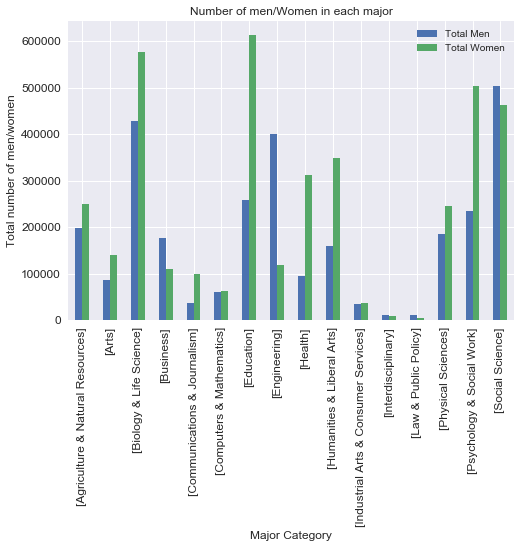

In [6]:
#plot number of women vs number of men in major category scatter plot vs median pay
plt.close('all')
ax = df3[['Total Men','Total Women']].plot(kind='bar', title ="Number of men/Women in each major", legend=True, fontsize=12)
ax.set_xlabel("Major Category", fontsize=12)
ax.set_ylabel("Total number of men/women", fontsize=12)
fig = ax.get_figure()
fig.savefig("ComparisionNumberOfMenWomen")
plt.show()

In [7]:
df4=pd.read_csv("~/Final/Data/iq-vs-salary-by-major.csv")
df4.head()

,Major,Verbal_SAT,Quant_SAT,Average_SAT,Average_IQ,Bachelors_Total,Baccelors_Male,Bachelors_Female,Pct_Female,Median_Salary,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Physics & Astronomy,533,736,1269,133,5472,4391,1081,0.197551,45000.0,NaN,NaN,NaN,NaN,NaN
1,Philosophy,590,638,1228,129,7179,4998,2181,0.303803,32200.0,NaN,NaN,NaN,NaN,NaN
2,Mathematical Sciences,502,733,1235,130,18842,10723,8119,0.430899,45000.0,NaN,NaN,NaN,NaN,NaN
3,Materials Engineering,494,727,1221,129,1028,754,274,0.266537,52000.0,NaN,NaN,NaN,NaN,NaN
4,Economics,503,706,1209,128,26425,18698,7727,0.292412,47000.0,NaN,NaN,NaN,NaN,NaN


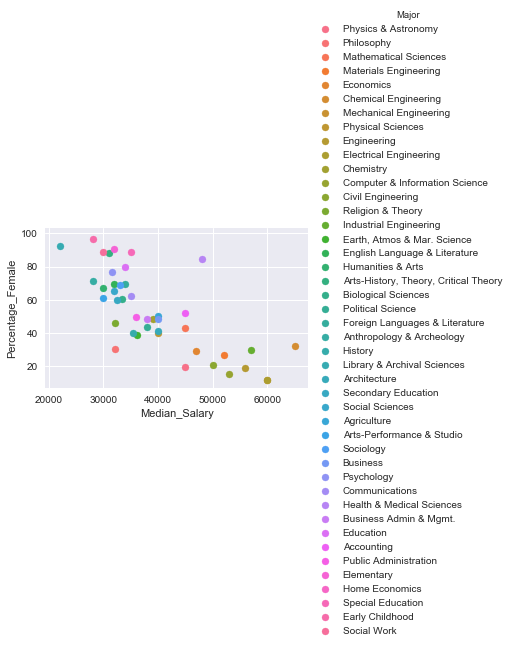

In [8]:
#Plot of percenatge of women in each major Vs median pay
major=[]
for index,row in df4.iterrows():
    major.append(row['Major'])
df5=pd.DataFrame({'Median_Salary': df4.Median_Salary,'Percentage_Female':df4.Pct_Female*100,'Major':major})
fg = sns.FacetGrid(data=df5, hue='Major', hue_order=major, aspect=1.61)
fg.map(plt.scatter, 'Median_Salary', 'Percentage_Female').add_legend()
fg.savefig("Percentage_femaleVsMedian")
fg.fig